In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
mu: float = .0
var: float = 1.0
n_samples: int = 100000

j = np.random.normal(mu, var, n_samples)

In [3]:
j

array([-1.23642374,  0.73110013,  0.24824202, ...,  0.65865905,
       -1.49667692, -0.38417276])

Traceback (most recent call last):
  File "/opt/anaconda3/bin/matplotlib", line 11, in <module>
    sys.exit(plotting._matplotlib())
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


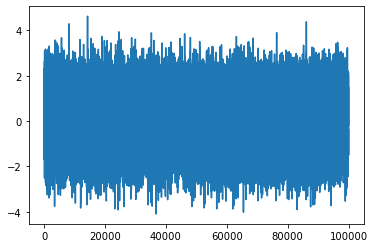

In [5]:
import matplotlib.pyplot as plt
!matplotlib inline

plt.plot(j)
plt.show()

In [7]:
# create dataframe of high-freq dates
df0 = pd.date_range(periods=n_samples, freq=pd.tseries.offsets.Minute(), end=dt.datetime.today())
df0

DatetimeIndex(['2022-04-23 03:50:47.150591', '2022-04-23 03:51:47.150591',
               '2022-04-23 03:52:47.150591', '2022-04-23 03:53:47.150591',
               '2022-04-23 03:54:47.150591', '2022-04-23 03:55:47.150591',
               '2022-04-23 03:56:47.150591', '2022-04-23 03:57:47.150591',
               '2022-04-23 03:58:47.150591', '2022-04-23 03:59:47.150591',
               ...
               '2022-07-01 14:20:47.150591', '2022-07-01 14:21:47.150591',
               '2022-07-01 14:22:47.150591', '2022-07-01 14:23:47.150591',
               '2022-07-01 14:24:47.150591', '2022-07-01 14:25:47.150591',
               '2022-07-01 14:26:47.150591', '2022-07-01 14:27:47.150591',
               '2022-07-01 14:28:47.150591', '2022-07-01 14:29:47.150591'],
              dtype='datetime64[ns]', length=100000, freq='T')

In [8]:
X = pd.Series(j, index=df0, name= 'close').to_frame()

In [9]:
print(f"The max of the synthetic dataset is {X.max()}.")
print(f"The min of the synthetic dataset is {X.min()}.")
print(f"The mean of the synthetic dataset is {X.mean()}.")
print(f"The variance of the synthetic dataset is {X.var()}.")

The max of the synthetic dataset is close    4.622292
dtype: float64.
The min of the synthetic dataset is close   -4.095445
dtype: float64.
The mean of the synthetic dataset is close   -0.00051
dtype: float64.
The variance of the synthetic dataset is close    0.999609
dtype: float64.


In [10]:
X

,close
2022-04-23 03:50:47.150591,-1.236424
2022-04-23 03:51:47.150591,0.731100
2022-04-23 03:52:47.150591,0.248242
2022-04-23 03:53:47.150591,-0.636889
2022-04-23 03:54:47.150591,-0.139853
...,...
2022-07-01 14:25:47.150591,0.688433
2022-07-01 14:26:47.150591,-0.282267
2022-07-01 14:27:47.150591,0.658659
2022-07-01 14:28:47.150591,-1.496677


In [11]:
X = X.cumsum()
X

,close
2022-04-23 03:50:47.150591,-1.236424
2022-04-23 03:51:47.150591,-0.505324
2022-04-23 03:52:47.150591,-0.257082
2022-04-23 03:53:47.150591,-0.893971
2022-04-23 03:54:47.150591,-1.033824
...,...
2022-07-01 14:25:47.150591,-49.522754
2022-07-01 14:26:47.150591,-49.805021
2022-07-01 14:27:47.150591,-49.146362
2022-07-01 14:28:47.150591,-50.643039


In [13]:
# initialize adjusted list
close_adj = []
# loop to scale up data to get rid of negatives
for i in X['close']:
    value = i +500
    close_adj.append(value)
# adding list of adj prices as new column
X['Adjusted Close'] = close_adj

In [14]:
# let's get rid of the old column
X = X.drop('close',1)
print(X)

                            Adjusted Close
2022-04-23 03:50:47.150591      498.763576
2022-04-23 03:51:47.150591      499.494676
2022-04-23 03:52:47.150591      499.742918
2022-04-23 03:53:47.150591      499.106029
2022-04-23 03:54:47.150591      498.966176
...                                    ...
2022-07-01 14:25:47.150591      450.477246
2022-07-01 14:26:47.150591      450.194979
2022-07-01 14:27:47.150591      450.853638
2022-07-01 14:28:47.150591      449.356961
2022-07-01 14:29:47.150591      448.972788

[100000 rows x 1 columns]


/var/folders/24/zq2kr6wj56n_z35x877bp6yr0000gn/T/ipykernel_8313/2272066429.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('close',1)


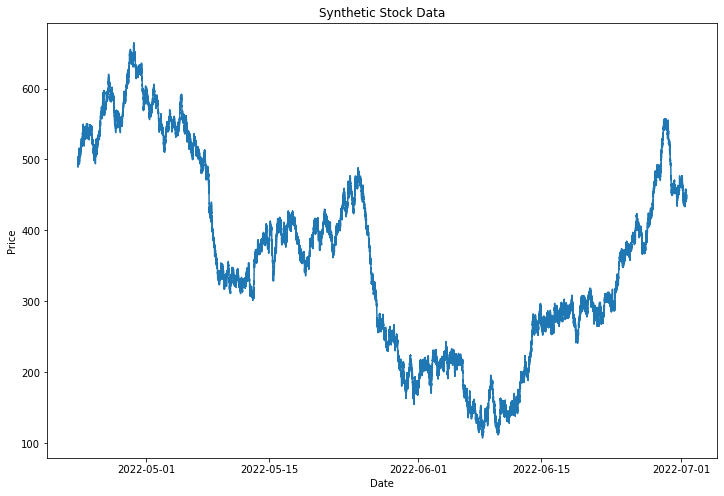

In [17]:
# now let's plot it 
plt.plot(X)
plt.title('Synthetic Stock Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.rcParams['figure.figsize'] = (15,8)
plt.show()

In [18]:
print(f"The max of the synthetic dataset is {X.max()}.")
print(f"The min of the synthetic dataset is {X.min()}.")
print(f"The mean of the synthetic dataset is {X.mean()}.")
print(f"The variance of the synthetic dataset is {X.var()}.")

The max of the synthetic dataset is Adjusted Close    664.62922
dtype: float64.
The min of the synthetic dataset is Adjusted Close    107.410448
dtype: float64.
The mean of the synthetic dataset is Adjusted Close    363.373497
dtype: float64.
The variance of the synthetic dataset is Adjusted Close    18858.154482
dtype: float64.
